In [1]:
!pip install tensorflow

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
from sklearn.preprocessing import LabelEncoder,StandardScaler
import warnings
warnings.filterwarnings('ignore')

In [3]:
forest_data=pd.read_csv('forestfires.csv')
pd.set_option('display.max_columns',None)
forest_data

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,daymon,daysat,daysun,daythu,daytue,daywed,monthapr,monthaug,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,small
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,large
513,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,large
514,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,large
515,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,small


EDA

In [4]:
forest_data.shape

(517, 31)

In [5]:
forest_data.isnull().sum()

month            0
day              0
FFMC             0
DMC              0
DC               0
ISI              0
temp             0
RH               0
wind             0
rain             0
area             0
dayfri           0
daymon           0
daysat           0
daysun           0
daythu           0
daytue           0
daywed           0
monthapr         0
monthaug         0
monthdec         0
monthfeb         0
monthjan         0
monthjul         0
monthjun         0
monthmar         0
monthmay         0
monthnov         0
monthoct         0
monthsep         0
size_category    0
dtype: int64

In [6]:
forest_data.describe()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,daymon,daysat,daysun,daythu,daytue,daywed,monthapr,monthaug,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292,0.164410,0.143133,0.162476,0.183752,0.117988,0.123791,0.104449,0.017408,0.355899,0.017408,0.038685,0.003868,0.061896,0.032882,0.104449,0.003868,0.001934,0.029014,0.332689
std,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818,0.371006,0.350548,0.369244,0.387657,0.322907,0.329662,0.306138,0.130913,0.479249,0.130913,0.193029,0.062137,0.241199,0.178500,0.306138,0.062137,0.043980,0.168007,0.471632
min,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [7]:
forest_data.dtypes

month             object
day               object
FFMC             float64
DMC              float64
DC               float64
ISI              float64
temp             float64
RH                 int64
wind             float64
rain             float64
area             float64
dayfri             int64
daymon             int64
daysat             int64
daysun             int64
daythu             int64
daytue             int64
daywed             int64
monthapr           int64
monthaug           int64
monthdec           int64
monthfeb           int64
monthjan           int64
monthjul           int64
monthjun           int64
monthmar           int64
monthmay           int64
monthnov           int64
monthoct           int64
monthsep           int64
size_category     object
dtype: object

In [8]:
forest_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 31 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   month          517 non-null    object 
 1   day            517 non-null    object 
 2   FFMC           517 non-null    float64
 3   DMC            517 non-null    float64
 4   DC             517 non-null    float64
 5   ISI            517 non-null    float64
 6   temp           517 non-null    float64
 7   RH             517 non-null    int64  
 8   wind           517 non-null    float64
 9   rain           517 non-null    float64
 10  area           517 non-null    float64
 11  dayfri         517 non-null    int64  
 12  daymon         517 non-null    int64  
 13  daysat         517 non-null    int64  
 14  daysun         517 non-null    int64  
 15  daythu         517 non-null    int64  
 16  daytue         517 non-null    int64  
 17  daywed         517 non-null    int64  
 18  monthapr  

plotting the graph

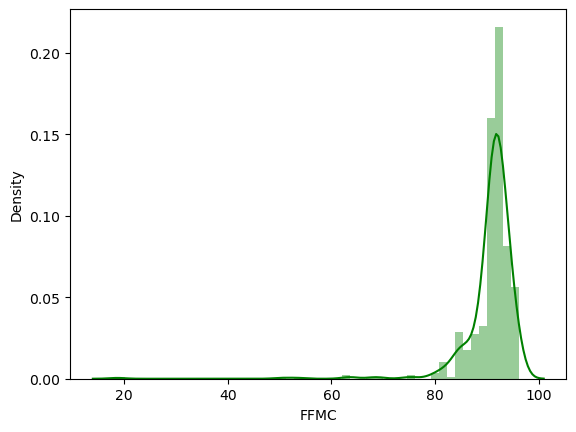

In [9]:
sns.distplot(forest_data['FFMC'], color = 'green')
plt.show()

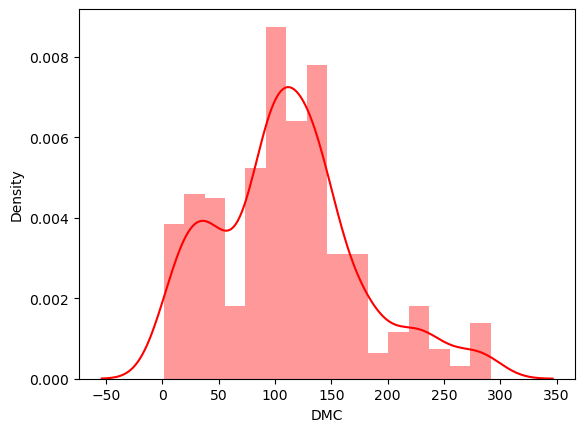

In [10]:
sns.distplot(forest_data['DMC'], color = 'red')
plt.show()

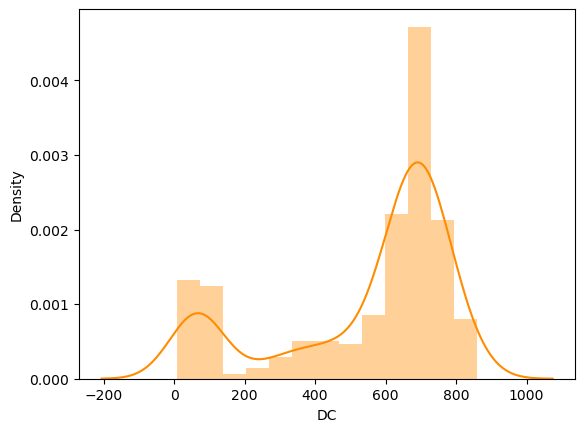

In [11]:
sns.distplot(forest_data['DC'], color = 'darkorange')
plt.show()

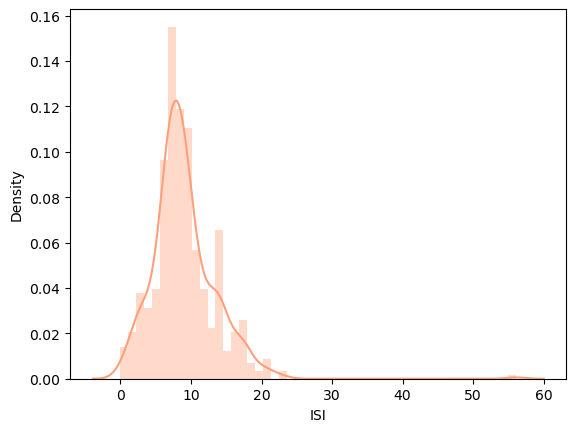

In [12]:
sns.distplot(forest_data['ISI'], color = 'lightsalmon')
plt.show()

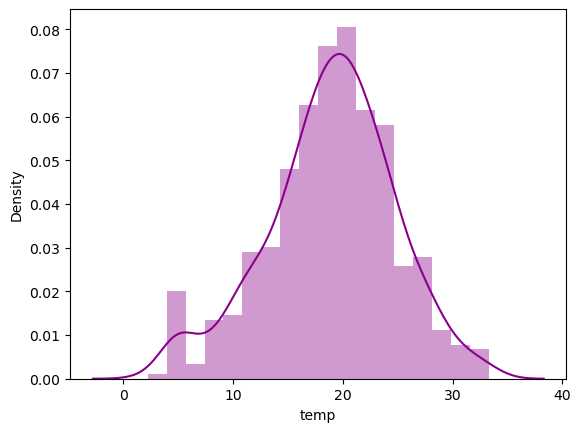

In [13]:
sns.distplot(forest_data['temp'], color = 'darkmagenta')
plt.show()

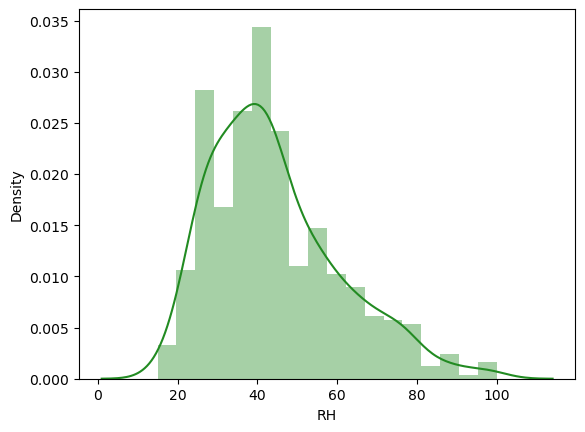

In [14]:
sns.distplot(forest_data['RH'], color = 'forestgreen')
plt.show()

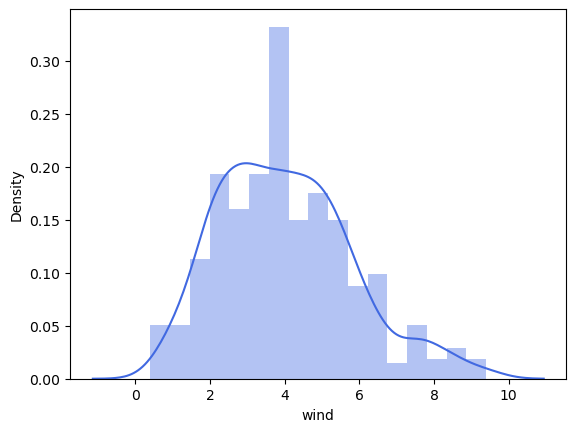

In [15]:
sns.distplot(forest_data['wind'], color = 'royalblue')
plt.show()

correlation

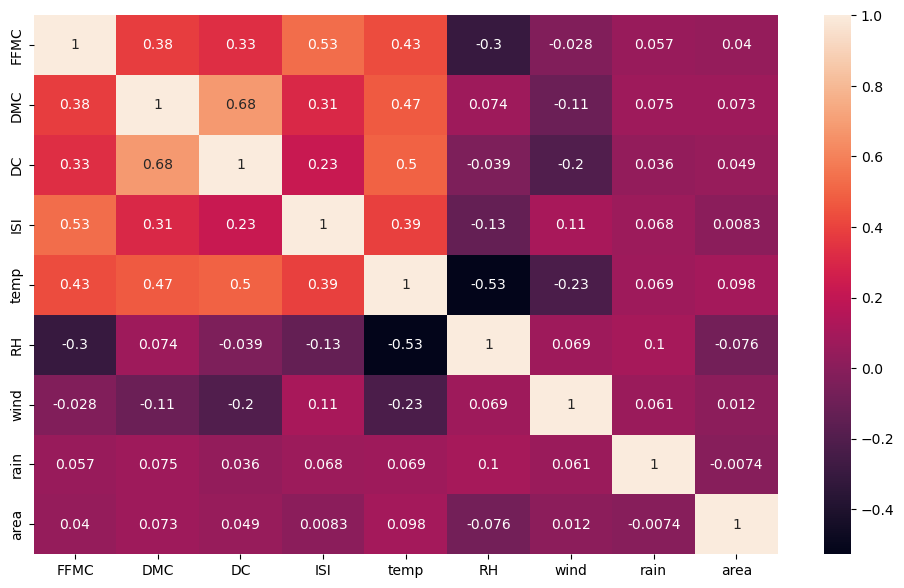

In [16]:
corr=forest_data[forest_data.columns[:11]].corr()
plt.figure(figsize=(12,7))
sns.heatmap(corr,annot=True)
plt.show()

In [17]:
df=forest_data[forest_data.columns]
month_day_columns=df.select_dtypes(include='object').columns.tolist()

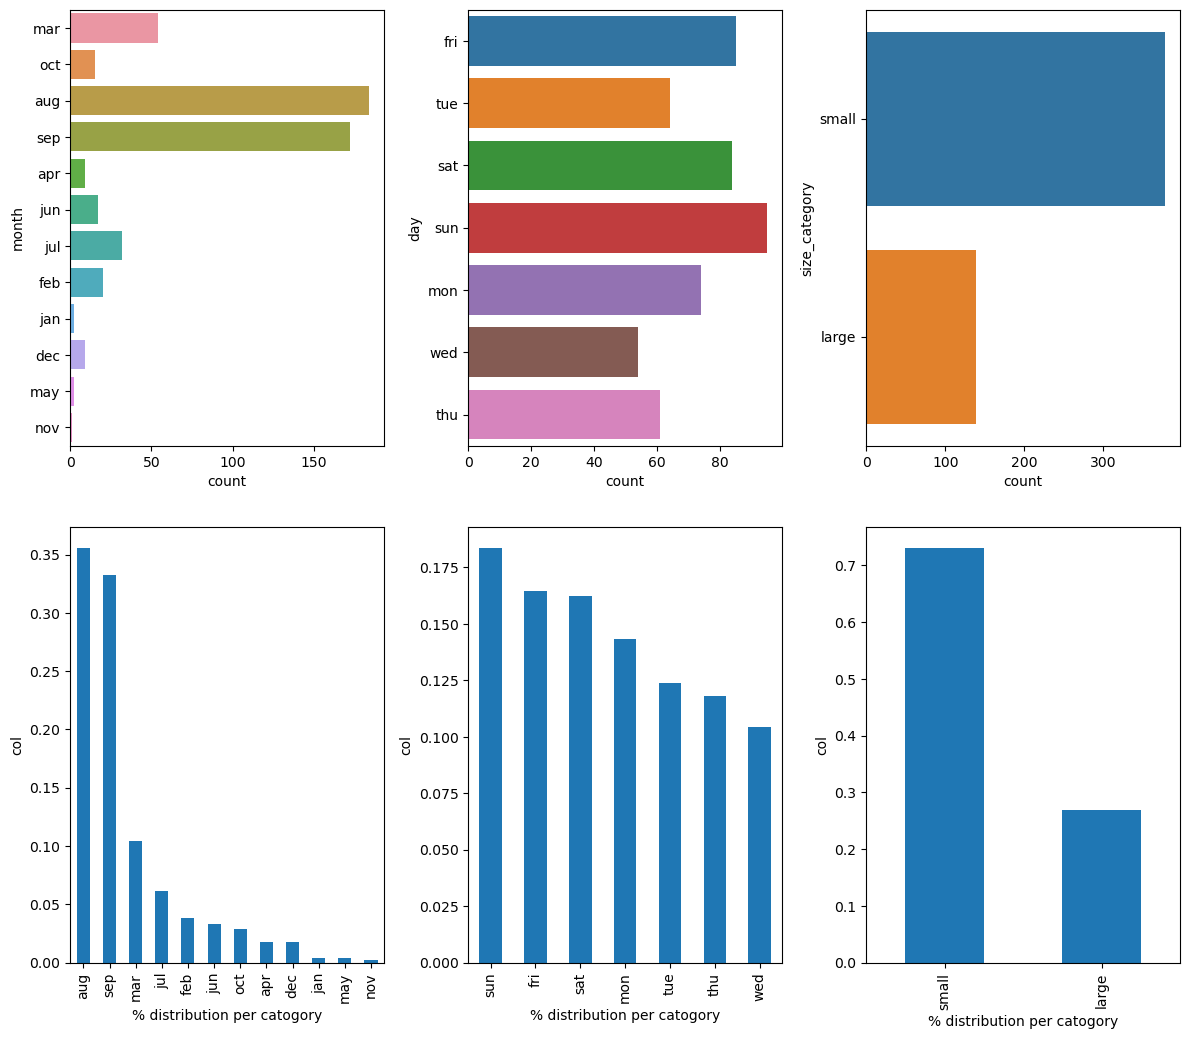

In [18]:
plt.figure(figsize=(12,15))
for i,col in enumerate(month_day_columns,1):
    plt.subplot(3,3,i)
    sns.countplot(data=df,y=col)
    plt.subplot(3,3,3+i)
    forest_data[col].value_counts(normalize=True).plot.bar()
    plt.xlabel('% distribution per catogory')
    plt.ylabel("col")
plt.tight_layout()
plt.show()

In [19]:
df1=forest_data[forest_data.columns[2:11]]
num_columns=df1.select_dtypes(exclude='object').columns.tolist()

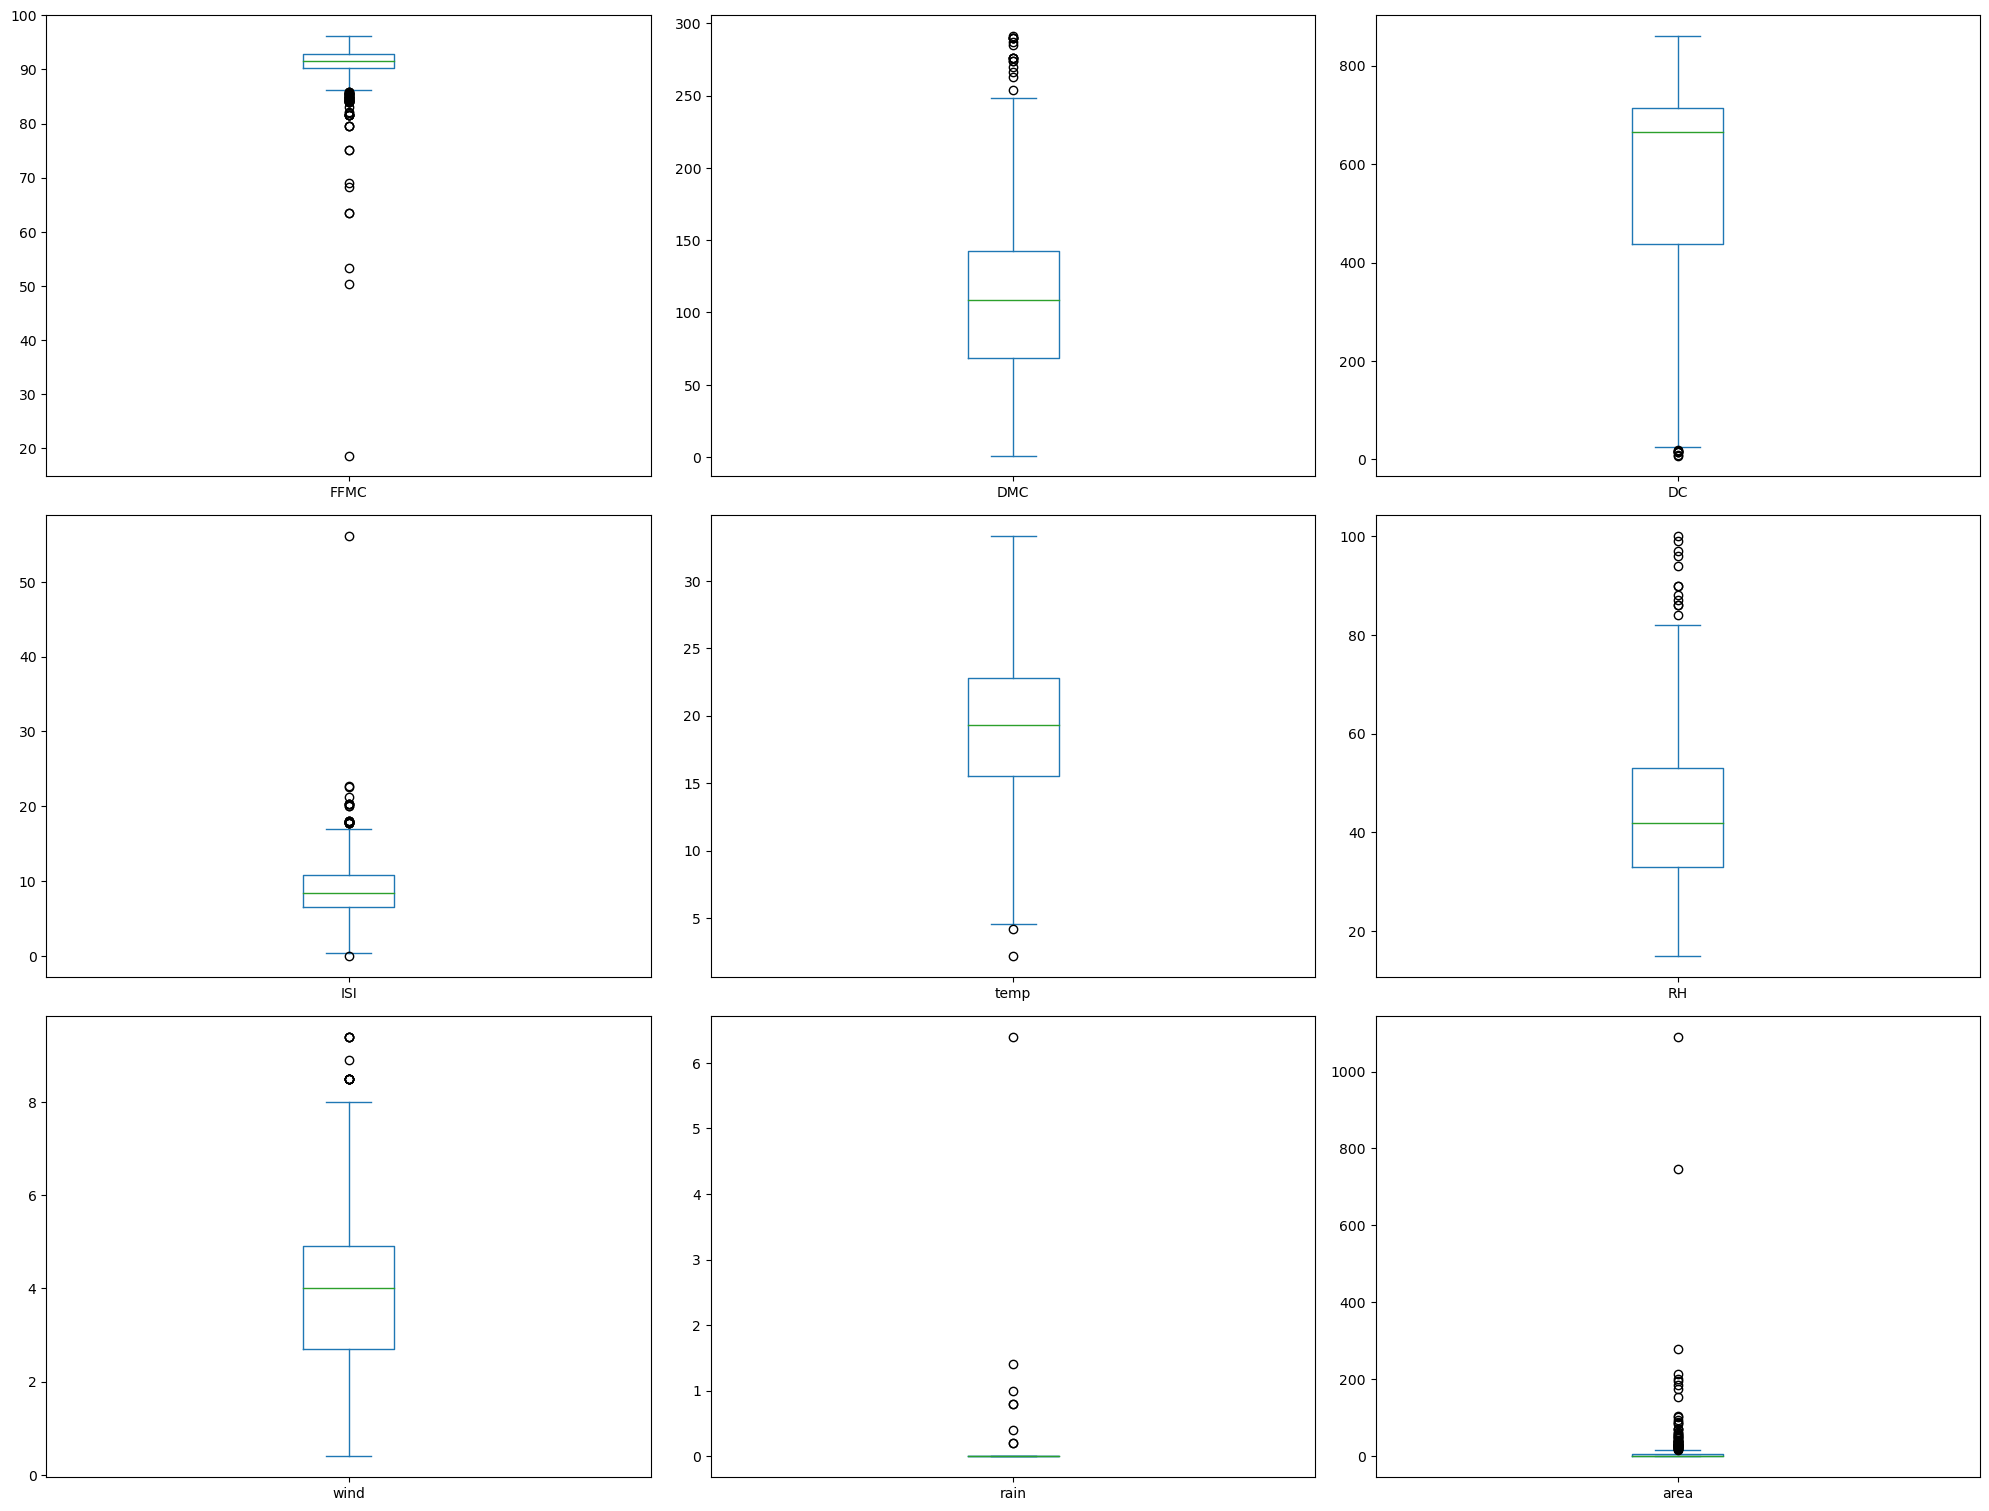

In [20]:
plt.figure(figsize=(20,45))
for i,col in enumerate(num_columns,1):
    plt.subplot(9,3,i)
    forest_data[col].plot.box()
plt.tight_layout()
plt.show()

In [21]:
#lets drop orginal columns month and day having dummy columns
forest_data=forest_data.drop(['month','day'],axis=1)
forest_data

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,daymon,daysat,daysun,daythu,daytue,daywed,monthapr,monthaug,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,small
1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,small
2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,small
3,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,small
4,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,small
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,large
513,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,large
514,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,large
515,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,small


In [22]:
#convert string value of size category into numerical value 
forest_data.loc[forest_data['size_category']=='small','size_category']=0
forest_data.loc[forest_data['size_category']=='large','size_category']=1

In [23]:
forest_data['size_category'].value_counts()

0    378
1    139
Name: size_category, dtype: int64

splitting data

In [24]:
x=forest_data.drop('size_category',axis=1)
y=forest_data[['size_category']]

In [25]:
y.dtypes

size_category    object
dtype: object

In [26]:
le=LabelEncoder()
y=le.fit_transform(y)
forest_data

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,daymon,daysat,daysun,daythu,daytue,daywed,monthapr,monthaug,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
4,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
513,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
514,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
515,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0


Normalize the Data

In [27]:
std=StandardScaler()
x_scaled=std.fit_transform(x)


Model Architecture

In [28]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=.20,random_state=12)

In [29]:
model=Sequential()
model.add(Dense(units=29,activation='relu'))
model.add(Dense(units=40,activation='relu'))
model.add(Dense(units=1,activation='sigmoid'))

Model Compilation

In [30]:
model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics='accuracy')

Model Testing

In [31]:
model1=model.fit(x_train,y_train,epochs=100,batch_size=50,validation_split=0.15,validation_data=(x_test,y_test))

Epoch 1/100


9/9 [==============================] - 1s 28ms/step - loss: 0.7633 - accuracy: 0.4794 - val_loss: 0.7003 - val_accuracy: 0.5962
Epoch 2/100
9/9 [==============================] - 0s 6ms/step - loss: 0.6531 - accuracy: 0.6392 - val_loss: 0.6899 - val_accuracy: 0.6442
Epoch 3/100
9/9 [==============================] - 0s 5ms/step - loss: 0.6067 - accuracy: 0.7312 - val_loss: 0.6939 - val_accuracy: 0.6635
Epoch 4/100
9/9 [==============================] - 0s 5ms/step - loss: 0.5823 - accuracy: 0.7409 - val_loss: 0.7010 - val_accuracy: 0.6635
Epoch 5/100
9/9 [==============================] - 0s 5ms/step - loss: 0.5651 - accuracy: 0.7458 - val_loss: 0.7010 - val_accuracy: 0.6635
Epoch 6/100
9/9 [==============================] - 0s 5ms/step - loss: 0.5529 - accuracy: 0.7482 - val_loss: 0.7016 - val_accuracy: 0.6635
Epoch 7/100
9/9 [==============================] - 0s 5ms/step - loss: 0.5425 - accuracy: 0.7554 - val_loss: 0.7098 - val_accuracy: 0.6731
Epoch 8/100
9/9 [=======

9/9 [==============================] - 0s 5ms/step - loss: 0.2553 - accuracy: 0.8935 - val_loss: 0.7551 - val_accuracy: 0.8173
Epoch 57/100
9/9 [==============================] - 0s 5ms/step - loss: 0.2490 - accuracy: 0.8959 - val_loss: 0.7571 - val_accuracy: 0.8365
Epoch 58/100
9/9 [==============================] - 0s 5ms/step - loss: 0.2427 - accuracy: 0.9056 - val_loss: 0.7650 - val_accuracy: 0.8365
Epoch 59/100
9/9 [==============================] - 0s 6ms/step - loss: 0.2378 - accuracy: 0.9080 - val_loss: 0.7775 - val_accuracy: 0.8269
Epoch 60/100
9/9 [==============================] - 0s 5ms/step - loss: 0.2315 - accuracy: 0.9201 - val_loss: 0.7763 - val_accuracy: 0.8365
Epoch 61/100
9/9 [==============================] - 0s 5ms/step - loss: 0.2250 - accuracy: 0.9104 - val_loss: 0.7822 - val_accuracy: 0.8365
Epoch 62/100
9/9 [==============================] - 0s 5ms/step - loss: 0.2199 - accuracy: 0.9153 - val_loss: 0.7851 - val_accuracy: 0.8462
Epoch 63/100
9/9 [===============

Model Evaluation

In [32]:
model.evaluate(x_train,y_train)

13/13 [==============================] - 0s 2ms/step - loss: 0.0722 - accuracy: 0.9903


[0.07224329560995102, 0.990314781665802]

In [33]:
model.evaluate(x_test,y_test)

4/4 [==============================] - 0s 2ms/step - loss: 1.0961 - accuracy: 0.8750


[1.096147060394287, 0.875]

plt.plot(model1.history['accuracy'])
plt.plot(model1.history['val_accuracy'])
plt.title('RMSPROP model accuracy', color = 'navy')
plt.ylabel('accuracy', color = 'red')
plt.xlabel('epoch', color = 'purple')
plt.legend(['train','test'],loc='upper left',)
plt.show()

Model Compilation

In [34]:
model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics='accuracy')

Model Testing

In [35]:
model2=model.fit(x_train,y_train,epochs=100,batch_size=50,validation_split=0.15,validation_data=(x_test,y_test))

Epoch 1/100
9/9 [==============================] - 1s 23ms/step - loss: 0.0741 - accuracy: 0.9782 - val_loss: 1.1227 - val_accuracy: 0.8750
Epoch 2/100
9/9 [==============================] - 0s 6ms/step - loss: 0.0674 - accuracy: 0.9831 - val_loss: 1.1279 - val_accuracy: 0.8654
Epoch 3/100
9/9 [==============================] - 0s 5ms/step - loss: 0.0635 - accuracy: 0.9855 - val_loss: 1.1457 - val_accuracy: 0.8654
Epoch 4/100
9/9 [==============================] - 0s 5ms/step - loss: 0.0610 - accuracy: 0.9903 - val_loss: 1.1507 - val_accuracy: 0.8846
Epoch 5/100
9/9 [==============================] - 0s 5ms/step - loss: 0.0573 - accuracy: 0.9879 - val_loss: 1.1579 - val_accuracy: 0.8846
Epoch 6/100
9/9 [==============================] - 0s 6ms/step - loss: 0.0574 - accuracy: 0.9879 - val_loss: 1.1795 - val_accuracy: 0.8750
Epoch 7/100
9/9 [==============================] - 0s 6ms/step - loss: 0.0546 - accuracy: 0.9879 - val_loss: 1.2011 - val_accuracy: 0.8654
Epoch 8/100
9/9 [=========

9/9 [==============================] - 0s 6ms/step - loss: 0.0079 - accuracy: 0.9976 - val_loss: 1.9628 - val_accuracy: 0.9231
Epoch 60/100
9/9 [==============================] - 0s 6ms/step - loss: 0.0063 - accuracy: 1.0000 - val_loss: 1.9827 - val_accuracy: 0.9327
Epoch 61/100
9/9 [==============================] - 0s 6ms/step - loss: 0.0061 - accuracy: 1.0000 - val_loss: 2.0228 - val_accuracy: 0.9231
Epoch 62/100
9/9 [==============================] - 0s 5ms/step - loss: 0.0071 - accuracy: 1.0000 - val_loss: 2.0211 - val_accuracy: 0.9231
Epoch 63/100
9/9 [==============================] - 0s 6ms/step - loss: 0.0058 - accuracy: 1.0000 - val_loss: 2.0320 - val_accuracy: 0.9327
Epoch 64/100
9/9 [==============================] - 0s 6ms/step - loss: 0.0057 - accuracy: 1.0000 - val_loss: 2.0342 - val_accuracy: 0.9327
Epoch 65/100
9/9 [==============================] - 0s 6ms/step - loss: 0.0060 - accuracy: 1.0000 - val_loss: 2.0481 - val_accuracy: 0.9231
Epoch 66/100
9/9 [===============

Model Evaluation

In [36]:
model.evaluate(x_train,y_train)

13/13 [==============================] - 0s 1ms/step - loss: 0.0012 - accuracy: 1.0000


[0.0011834242613986135, 1.0]

In [37]:
model.evaluate(x_test,y_test)

4/4 [==============================] - 0s 4ms/step - loss: 2.5909 - accuracy: 0.9135


[2.590883493423462, 0.9134615659713745]

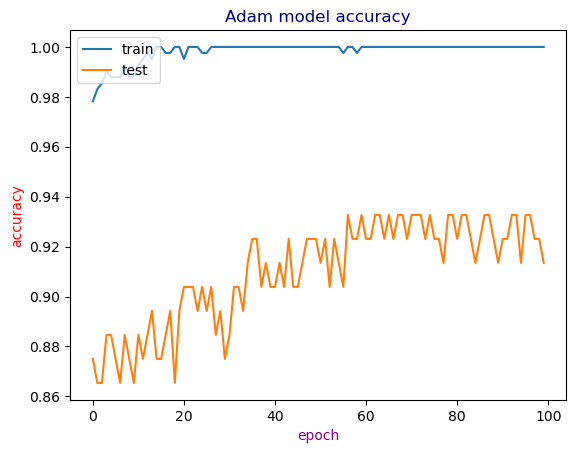

In [38]:
plt.plot(model2.history['accuracy'])
plt.plot(model2.history['val_accuracy'])
plt.title('Adam model accuracy', color = 'navy')
plt.ylabel('accuracy', color = 'red')
plt.xlabel('epoch', color = 'purple')
plt.legend(['train','test'],loc='upper left',)
plt.show()

model 2 gives the best accuracy